## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to $\frac{25}{30}$ ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [124]:
# If you didn't download it yet, please get the relevant file now!
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

#import antigravity

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [125]:
import pandas as pd
import numpy as np

2\. Find out the number of BX in a ORBIT (the value 'x').

In [126]:
file_name="/home/giosue/data/data_000637.txt"
data=pd.read_csv(file_name)
N = 15000

dataN = data[:N]

x = max(dataN['BX_COUNTER']) + 1
print(x)


3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [127]:
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

maxns = max(data['timens'])
orbits = data['ORBIT_CNT'][len(data['ORBIT_CNT'])-1] - data['ORBIT_CNT'][0]

print('Time in ns:', maxns*orbits)
print('Time in seconds:', maxns*orbits*1e-9)


Time in ns: 980447230.0
Time in seconds: 0.9804472300000001


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [128]:
data['timens'] = (data['ORBIT_CNT']-data['ORBIT_CNT'][0])*x*25 + (data['BX_COUNTER']-data['BX_COUNTER'][0])*25 + (data['TDC_MEAS']-data['TDC_MEAS'][0])*25/30

print(data)


         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0           61  3869211171         762        18   

               timens  
0        0.000000e+00  
1        8.333333e-01  
2        4.476667e+03  
3        4.594167e+03  
4        9.649167e+03  
...            

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [129]:
import random

mask =[]
for i in range(len(data)):
    mask.append(random.randrange(2))

data['HEAD'] = mask
print(data['HEAD'])

0          0
1          0
2          1
3          0
4          0
          ..
1310715    0
1310716    1
1310717    0
1310718    0
1310719    0
Name: HEAD, Length: 1310720, dtype: int64


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [130]:
data_head1 = data[data['HEAD'] == 1]
data_head1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
2,1,0,63,3869200167,2553,28,4.476667e+03
7,1,0,139,3869200167,2776,0,1.002833e+04
10,1,1,7,3869200167,2785,4,1.025667e+04
12,1,1,6,3869200167,2792,18,1.044333e+04
13,1,0,36,3869200167,2791,23,1.042250e+04
...,...,...,...,...,...,...,...
1310701,1,0,139,3869211171,21,0,9.803976e+08
1310703,1,0,25,3869211171,20,13,9.803975e+08
1310711,1,1,39,3869211171,430,0,9.804078e+08
1310714,1,0,60,3869211171,762,2,9.804161e+08


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

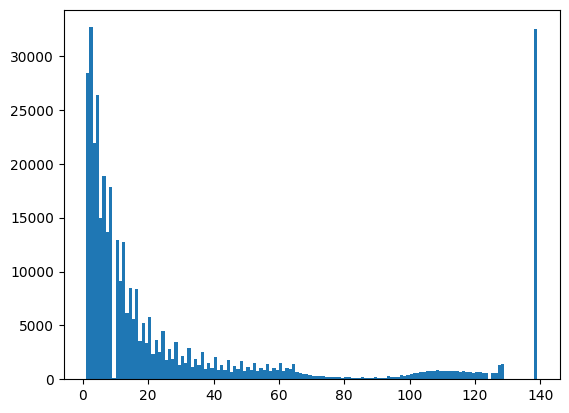

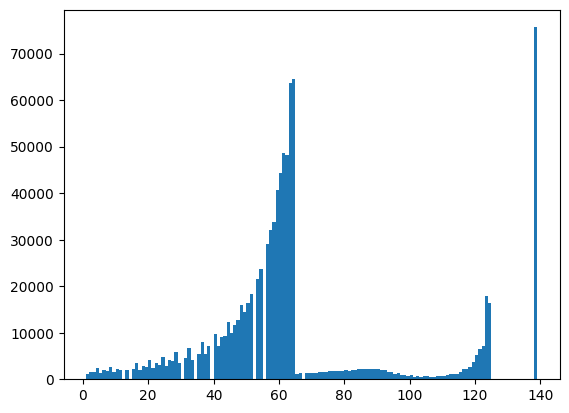

In [131]:
import matplotlib.pyplot as plt

max_tdc = max(data['TDC_CHANNEL'])
min_tdc = min(data['TDC_CHANNEL'])

plt.hist(data[data['FPGA'] == 1]['TDC_CHANNEL'], max_tdc - min_tdc)
plt.show()
plt.hist(data[data['FPGA'] == 0]['TDC_CHANNEL'], max_tdc - min_tdc)
plt.show()


8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [146]:
data['conti'] = 1
data_grouped = data.groupby('TDC_CHANNEL')['conti'].sum()

print(data_grouped.sort_values().tail(3))

TDC_CHANNEL
63      64642
64      66020
139    108059
Name: conti, dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [133]:
print(np.unique(data['ORBIT_CNT'],return_counts=True)[1])
print(np.unique(data[data['TDC_CHANNEL'] == 139]['ORBIT_CNT'],return_counts=True)[1])


[ 43  85 127 ... 191 137  22]
[ 4  8 11 ... 13 12  2]
